# USA House Prices - EDA

Attempt to create a multiple linear regression model to predict USA House Prices. The dataset is from Kaggle. https://www.kaggle.com/datasets/fratzcan/usa-house-prices?resource=download

In [2]:
# dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# import data 
df = pd.read_csv('../data/USA Housing Dataset.csv')

### Feature Exploration

Our columns include:
+ date - date sold
+ bedrooms - number of bedrooms
+ bathrooms
+ sqft_living - sqrt feet of living area
+ sqft_lot - sqft of the lot its on
+ floors - how many floors
+ waterfront - waterfront view, binary. 1 for yes 0 for no
+ view - index from 0-4 with 4 being best view. (waterfront is usually 4 but NOT ALWAYS).
+ condition - index from 1-5 with 5 being best condition
+ sqft_above - all sqft above basement so 1 floor homes are included
+ sqft_basement - basement sqft
+ yr_build - yr built
+ yr_renovated - year renovated
+ street - street name
+ city - city name
+ statezip - state and zip code - can be split
+ country - country (all USA)

+ price - target variable

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [5]:
# view datatypes and null counts - no nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [6]:
# view first 5 rows
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [7]:
# describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4140.0,553062.877289,583686.452245,0.0,320000.00,460000.00,659125.0,26590000.00
bedrooms,4140.0,3.400483,0.903939,0.0,3.00,3.00,4.0,8.00
bathrooms,4140.0,2.163043,0.784733,0.0,1.75,2.25,2.5,6.75
sqft_living,4140.0,2143.638889,957.481621,370.0,1470.00,1980.00,2620.0,10040.00
sqft_lot,4140.0,14697.638164,35876.838123,638.0,5000.00,7676.00,11000.0,1074218.00
floors,4140.0,1.514130,0.534941,1.0,1.00,1.50,2.0,3.50
waterfront,4140.0,0.007488,0.086219,0.0,0.00,0.00,0.0,1.00
view,4140.0,0.246618,0.790619,0.0,0.00,0.00,0.0,4.00
condition,4140.0,3.452415,0.678533,1.0,3.00,3.00,4.0,5.00
sqft_above,4140.0,1831.351449,861.382947,370.0,1190.00,1600.00,2310.0,8020.00


The first thing we see from the above statistics are that we have some homes that are worth 0.0. These must be dropped before we go any further. We can also try to impute the price of these after we fit our model but since we do not know the actual values we will not be able to measure the performance.

In [8]:
# homes with 0 price
zeros = df.loc[df['price'] == 0]

I am going to keep this data to the side and I may try to make predictions on the houses with a 0 price. All other columns do not appear to have any errors in the records so these may have just been left out. 

In [9]:
# view zeros data
zeros.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3894,2014-05-05 00:00:00,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA
3896,2014-05-05 00:00:00,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA
3897,2014-05-05 00:00:00,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA
3898,2014-05-06 00:00:00,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA
3901,2014-05-07 00:00:00,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,USA


In [10]:
# there are 49 homes with a 0 price
len(zeros)

49

In [11]:
# drop these
df.drop(df.loc[df['price'] == 0].index, inplace = True)

#### Statezip

Another observation from the initial look into the data is that there is a "statezip" column that includes the state and the zip within one columm. This should be split so that we can look at correlations between the state and zip with the target variable.

In [12]:
# split statezip into two different columns
state_split = df['statezip'].str.split(pat = ' ', expand = True)
df['state'] = state_split[0]
df['zip'] = state_split[1]
df.drop(columns = 'statezip', axis = 1, inplace = True)

### 1. Start with the date column
The date column may be interesting for our analysis. The first step is to view a line chart and look for any trends/outliers. From the plot, it is hard to tell if there is any trend but there appears to be at least three obvious outliers.

In [13]:
# sort by date
sorts = df.sort_values(by = 'date')

# use plotly express - just practicing.
fig = px.scatter(data_frame = sorts, x = 'date', y = 'price', title = 'Price and Date')
# add line to the scatter plot
fig.update_traces(mode ='lines+markers')
# add range slider
fig.update_xaxes(rangeslider_visible = True)
fig.show()

In [14]:
# create histogram of price - right skewed
fig = px.histogram(x=df['price'])
fig.update_layout(title = 'Price Histogram')
fig.show()

Create day, month, and year columns for the data. Then, graph it and look for any trends or correlations with the price variable. They seem to differ in prices a lot even during the same day so we will not do any time series analysis (more than one variable is important so we can't just go based on the day), however, if the weekends are lower or certain days mean more, we can use this as input to our model. Remember, it doesn't matter if a certain day of the week has more sales in terms of the number of homes, but it does matter (potentially) if certain days of the week drive prices up or down. 

When we checked out the info for the date column it was not in datetime format. Change that first. 

In [15]:
# change date column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [16]:
# verify it was changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4091 entries, 0 to 4139
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4091 non-null   datetime64[ns]
 1   price          4091 non-null   float64       
 2   bedrooms       4091 non-null   float64       
 3   bathrooms      4091 non-null   float64       
 4   sqft_living    4091 non-null   int64         
 5   sqft_lot       4091 non-null   int64         
 6   floors         4091 non-null   float64       
 7   waterfront     4091 non-null   int64         
 8   view           4091 non-null   int64         
 9   condition      4091 non-null   int64         
 10  sqft_above     4091 non-null   int64         
 11  sqft_basement  4091 non-null   int64         
 12  yr_built       4091 non-null   int64         
 13  yr_renovated   4091 non-null   int64         
 14  street         4091 non-null   object        
 15  city           4091 non-nu

In [17]:
# create three new columns: month, day, year, and name of the weekday and we can change it later.
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['weekday'] = df['date'].dt.day_name()

In [18]:
# year column can be dropped.
df['year'].unique()

array([2014], dtype=int32)

In [19]:
# verify data has been correctly changed
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,street,city,country,state,zip,day,month,year,weekday
4135,2014-07-09,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,...,1979,501 N 143rd St,Seattle,USA,WA,98133,9,7,2014,Wednesday
4136,2014-07-09,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,...,2009,14855 SE 10th Pl,Bellevue,USA,WA,98007,9,7,2014,Wednesday
4137,2014-07-09,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,...,0,759 Ilwaco Pl NE,Renton,USA,WA,98059,9,7,2014,Wednesday
4138,2014-07-10,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,...,0,5148 S Creston St,Seattle,USA,WA,98178,10,7,2014,Thursday
4139,2014-07-10,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,...,0,18717 SE 258th St,Covington,USA,WA,98042,10,7,2014,Thursday


In [20]:
# no longer need date column 
df.drop(columns = 'date', axis = 1, inplace = True)

Now, we can examine the prices based on month, year, day of month, and day of week to look for patterns.

In [21]:
# sort prices by month/weekday
df.groupby(['month', 'weekday'])['price'].mean()

month  weekday  
5      Friday       542816.109336
       Monday       546766.279303
       Saturday     599082.086957
       Sunday       460749.285714
       Thursday     531382.727826
       Tuesday      551967.907562
       Wednesday    524004.848685
6      Friday       566586.014797
       Monday       554728.203175
       Saturday     589982.875000
       Sunday       613631.666667
       Thursday     551331.369868
       Tuesday      532640.025375
       Wednesday    559126.503138
7      Friday       612500.000000
       Monday       527370.791165
       Saturday     873333.333333
       Sunday       709930.000000
       Thursday     857065.855072
       Tuesday      586434.934416
       Wednesday    564995.221812
Name: price, dtype: float64

In [22]:
month_group = pd.DataFrame(df.groupby(['month', 'weekday'])['price'].mean().reset_index())

In [23]:
month_group

,month,weekday,price
0,5,Friday,542816.109336
1,5,Monday,546766.279303
2,5,Saturday,599082.086957
3,5,Sunday,460749.285714
4,5,Thursday,531382.727826
5,5,Tuesday,551967.907562
6,5,Wednesday,524004.848685
7,6,Friday,566586.014797
8,6,Monday,554728.203175
9,6,Saturday,589982.875000


In this plot, we see that Saturday appears to be larger, especially in July but July 3rd was a major outlier that will effect the data. We can revisit these graphs once we remove the outliers.

In [24]:
# create a bar graph for weekday and price with color being the month
fig = px.bar(data_frame = month_group, x = 'weekday', y = 'price', color = month_group['month'].astype(str), 
             color_discrete_sequence = ['lightgreen', 'orange', 'lightblue'],
            title = 'Mean Price per Weekday')
fig.update_layout(legend_title_text='Month')
fig.show()

The month of July appears to have homes that sell for a higher price. This could be important or it can be because there are not many data points or outliers can exist that drive price in a certain direction. Let's start by seeing how many homes are sold in each month.

To do this, we are first going to create a month dictionary just for a neat print statement. Then, we set up an empty dictionary. The number of sales in each month will be the length of the given month in the dataframe. We used .astype(str) to help us generate the plotly colors. These are the values to our empty dictionary and the keys are the same keys as the months dictionary. 

In [25]:
# number of homes sold in each month
months = {'5': 'May', '6': 'June', '7': 'July'}
monthly_sale_num = {}
for key, value in months.items():
    # sales are the length of that key
    sales = len(df.loc[df['month'].astype(str) == key])
    # the sales are the values in our new dictionary. 
    monthly_sale_num[key] = sales
    print(f'The number of sales for {value} is: {sales}')

The number of sales for May is: 1288
The number of sales for June is: 2155
The number of sales for July is: 648


When making this graph, make sure the colors match the above graph or it will not be clear for those viewing.

Text(0.5, 1.0, 'Number of Sales per Month')

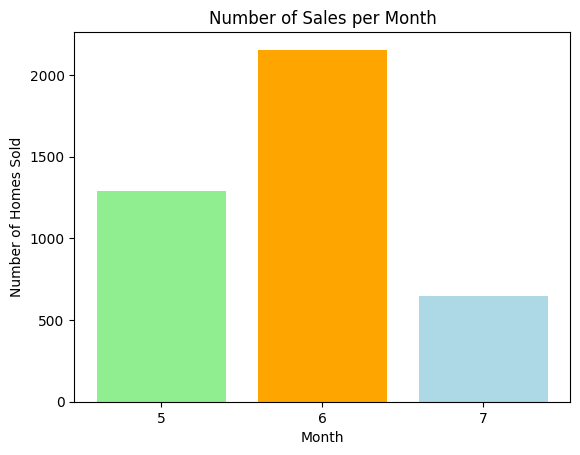

In [26]:
colors = ['lightgreen', 'orange', 'lightblue']
plt.bar(x = monthly_sale_num.keys(), height = monthly_sale_num.values(), color = colors)
plt.xlabel('Month')
plt.ylabel('Number of Homes Sold')
plt.title('Number of Sales per Month')

In [27]:
# practice plotly graph
fig = px.bar(x = months.values(), y = monthly_sale_num.values(), color = months.keys(),
             color_discrete_sequence=['lightgreen', 'orange', 'lightblue'],
            labels = {'x' : 'Month', 'y' : 'Mean Price'})
fig.update_layout(title = 'Sales per Month', legend_title_text = 'Month')
fig.show()

In [28]:
# group data by month - what is the mean price of homes sold per month
monthly_mean_sale = dict(df.groupby('month')['price'].mean())

This graph shows that July has a larger mean selling price.

Text(0.5, 1.0, 'Mean Price of Home Sold per Month')

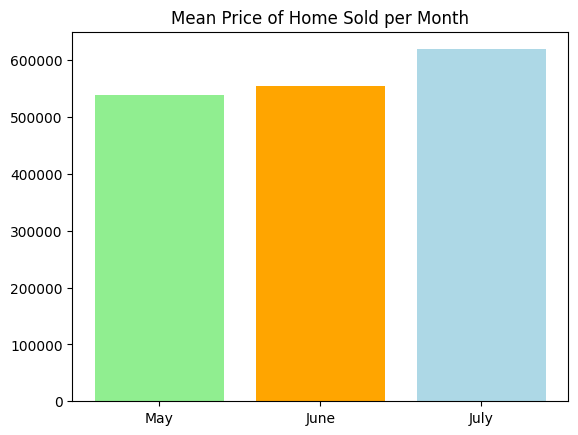

In [29]:
plt.bar(x = months.values(), height = monthly_mean_sale.values(), color = colors)
plt.title('Mean Price of Home Sold per Month')

In [30]:
# group by weekday to see if any are very different - saturday appears different, will have to examine for outliers
weekday_group = pd.DataFrame(df.groupby('weekday')['price'].mean().reset_index())

In [31]:
weekday_group

,weekday,price
0,Friday,557155.075499
1,Monday,549805.020952
2,Saturday,621284.262295
3,Sunday,582251.016949
4,Thursday,586493.789546
5,Tuesday,551983.181422
6,Wednesday,549313.904618


In [32]:
fig = px.bar(data_frame = weekday_group, x = 'weekday', y = 'price', 
            labels = {'weekday':'Weekday', 'price':'Mean Price'})
fig.update_layout(title = 'Mean Price per Weekday')
fig.show()

In [33]:
# weekday value counts - Saturday is only about 1% of data
df.value_counts('weekday', normalize = True)

weekday
Tuesday      0.238328
Wednesday    0.222440
Thursday     0.188218
Monday       0.181129
Friday       0.140552
Saturday     0.014911
Sunday       0.014422
Name: proportion, dtype: float64

Below is the most expensive home. This value is an outlier but we should see if it should be removed. By the numbers, we see that it only has three beds and two baths with no waterfront view, a 0 on the view scale, no basement and is 1 floor with only 1180sqft of living spacae. This appears to be either an error, or a value that does not represent a linear relationship comparable to their values. We also see that this was sold in July which may cause that month to have a higher mean. Should be dropped. 

In [34]:
# this is the max house price. Check other variables.
df.loc[df['price'].idxmax()]

price                   26590000.0
bedrooms                       3.0
bathrooms                      2.0
sqft_living                   1180
sqft_lot                      7793
floors                         1.0
waterfront                       0
view                             0
condition                        4
sqft_above                    1180
sqft_basement                    0
yr_built                      1992
yr_renovated                     0
street           12005 SE 219th Ct
city                          Kent
country                        USA
state                           WA
zip                          98031
day                              3
month                            7
year                          2014
weekday                   Thursday
Name: 3890, dtype: object

In [35]:
# group by day so we can see if there is any relationship between price and day within the month (1, 2, 3...)
days = pd.DataFrame(df.groupby('day')['price'].mean().reset_index())

In [36]:
# extreme outlier at day 3
fig = px.bar(data_frame = days, x = 'price', y = 'day', orientation='h', color = 'day')
fig.update_layout(title = 'Mean Price per Day Number', width = 900, height = 600)
fig.show()

I do not see much of any apparent pattern in the selling price based on the day of the week and this makes sense because we would not think that homes will be more expensive depending on the day of the month. This will be dropped as a feature.

In [37]:
# no apparent pattern
# potential to bin this into categories if the middle of the month is least expensive 
# 3rd is most expensive but that is where the largest outlier lies.
days.sort_values(by = 'price', ascending = False)

,day,price
2,3,701468.025492
0,1,634696.402986
29,30,613743.529388
10,11,602423.147727
11,12,601967.139892
16,17,585544.617861
12,13,579569.778954
5,6,573974.575994
17,18,572215.601937
4,5,566158.378385


In [38]:
# get the count of those days
counts = df['day'].value_counts()
print(counts)

day
23    226
9     222
20    220
27    193
19    184
3     175
16    169
12    168
2     167
13    162
8     145
30    141
26    138
25    135
10    134
24    129
28    123
1     122
17    113
18    104
4     102
5     102
21    101
22     98
7      91
14     89
15     88
11     88
29     82
6      74
31      6
Name: count, dtype: int64


The outlier is on July 3rd so that is why we see a spike

In [39]:
# create figure using plotly
fig = px.scatter(data_frame = days, x = 'day', y = 'price')
fig.update_traces(mode = 'markers+lines')
fig.update_layout(title = 'House Price by Day of the Month')
fig.update_xaxes(rangeslider_visible = True)

With these findings it is important to see what effect the outliers have on the data. Without going further, let's explore the outliers to see if they should be removed. A boxplot shows that there appear to be many. Once this process is done, we can view these statistics again to see if there is any findings.

### Price Outliers

From the boxplot, we see many outliers in our target variable. We also see important metrics such as:
+ upper fence = 1.16m
+ lower fence = 7800
+ IQR = 334,953 - middle 50% spread by this amount

In [40]:
# create simple boxplot
fig = px.box(df['price'])
fig.update_layout(title = 'Price Boxplot')
fig.show()

##### Outliers from the Price Variable

There are many ways to determine outliers but I will be using the IQR method here since our data is heavily skewed. 

In [41]:
# preserve original data by making a copy of our data frame.
data = df.copy()

In [42]:
def outlier_df(col, df):
    '''Return a DataFrame of the outliers of the given column'''
    # Create a copy of the DataFrame
    df_outs = df.copy()
    
    # Generate IQR for given column
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    # Outlier Bounds
    lower_outs = q1 - (1.5*iqr)
    upper_outs = q3 + (1.5*iqr)
    
    # Outliers
    outliers = df.loc[(df[col] < lower_outs) | (df[col] > upper_outs)]
    
    return outliers

In [43]:
# get price outliers and drop from the data
price_outliers = outlier_df('price', data)

In [44]:
len(price_outliers)

216

In [45]:
# what percent of data are outliers
216/4091

0.052798826692740164

In [46]:
# these are the outliers in the price column
price_outliers.round(2).head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,yr_renovated,street,city,country,state,zip,day,month,year,weekday
2,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,...,0,7070 270th Pl SE,Issaquah,USA,WA,98029,9,5,2014,Friday
11,1225000.0,4.0,4.50,5420,101930,1.0,0,0,3,3890,...,0,25005 NE Patterson Way,Redmond,USA,WA,98053,12,5,2014,Monday
18,1200000.0,3.0,1.75,1560,8078,1.5,1,4,4,1560,...,0,3603 W Mercer Way,Mercer Island,USA,WA,98040,12,5,2014,Monday
22,1575000.0,5.0,2.75,3650,20150,1.0,0,0,4,2360,...,0,1216 86th Ave NE,Bellevue,USA,WA,98004,12,5,2014,Monday
28,1315000.0,4.0,3.50,3460,3997,2.0,0,0,3,2560,...,2003,2346 N 59th St,Seattle,USA,WA,98103,12,5,2014,Monday


Maybe these homes have such a large selling price because they are all within the same street or zipcode. This would be useful information to the model. After further examination, there does not appear to be a strong enough trend here.

In [47]:
# change street variable so that the first four digits are not included
df['street'] = df['street'].str.replace(r'^\d+', '', regex= True)
data['street'] = data['street'].str.replace(r'^\d+', '', regex= True)

In [48]:
# strip leading whitespace
df['street'] = df['street'].str.lstrip()
data['street'] = data['street'].str.lstrip()

In [49]:
# street names - don't include the first set of numbers because that appears to be home address number
price_outliers['street'] = price_outliers['street'].str.replace(r'^\d+', '', regex= True)
price_outliers['street'] = price_outliers['street'].str.lstrip()

C:\Users\ryans\AppData\Local\Temp\ipykernel_62272\1527049487.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ryans\AppData\Local\Temp\ipykernel_62272\1527049487.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
# street counts
price_outliers['street'].value_counts()

street
E Mercer Way          4
48th Ave NE           3
15th Ave E            3
33rd Ave S            3
86th Ave NE           2
                     ..
-19021 SE 266th St    1
SE 219th Ct           1
21st Ave W            1
108th Ave SE          1
3rd Ave W             1
Name: count, Length: 189, dtype: int64

Many of the homes do not have a large number of bathrooms, a 5 for the condition, or a 4 for the view. Some also do not have much living space, but most have very large living space (over the 3rd quartile) so the prices may not be errors. However, the price of these homes will certainly skew our coefficients based on the histogram that we saw earlier when it was very skewed with extreme outliers. These outliers for the target variable will be droped but kept for reporting and further exploration.

In [51]:
# drop outliers for price
data = data.drop(price_outliers.index)

In [52]:
len(data)

3875

In [53]:
# create histogram of price
fig = px.histogram(data['price'])
fig.show()

By looking at the histogram, it has a heavy right skew and there still apears to be one potential outlier to the left of the graph. It is normally very important to treat outliers and data in a similar fashion, however, just because this data point did not have a value less than -3 zscore, it still does not make sense to have a home sell for 7,800. This can lessen the accuracy of the model by underestimating prices of homes with similar values for other features. To explore a little further, we notice the condition of this home is 1 so we can see if other homes with a 1 for condition have similar prices.

In [54]:
# find the index where the extremely low value is
data['price'].idxmin()

np.int64(3891)

In [55]:
# view the record with lowest price
data.loc[3891]

price                7800.0
bedrooms                2.0
bathrooms               1.0
sqft_living             780
sqft_lot              16344
floors                  1.0
waterfront                0
view                      0
condition                 1
sqft_above              780
sqft_basement             0
yr_built               1942
yr_renovated              0
street           S 144th St
city                Tukwila
country                 USA
state                    WA
zip                   98168
day                       6
month                     5
year                   2014
weekday             Tuesday
Name: 3891, dtype: object

In [56]:
# 1 as condition
df['condition'].value_counts()

condition
3    2572
4    1100
5     388
2      26
1       5
Name: count, dtype: int64

In [57]:
# view them
df.loc[df['condition'] == 1]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,yr_renovated,street,city,country,state,zip,day,month,year,weekday
962,550000.0,4.0,1.0,1660,34848,1.0,0,0,1,930,...,0,156th Ave NE,Redmond,USA,WA,98052,28,5,2014,Wednesday
1877,427000.0,4.0,1.0,1860,4736,1.5,0,0,1,1860,...,0,-2499 E Roy St,Seattle,USA,WA,98112,11,6,2014,Wednesday
2574,365000.0,4.0,2.0,1940,25600,1.0,0,0,1,1940,...,0,158th Ave SE,Bellevue,USA,WA,98006,23,6,2014,Monday
3218,235000.0,2.0,1.0,900,28800,1.0,0,0,1,900,...,0,Railroad Ave,Snoqualmie,USA,WA,98065,30,6,2014,Monday
3891,7800.0,2.0,1.0,780,16344,1.0,0,0,1,780,...,0,S 144th St,Tukwila,USA,WA,98168,6,5,2014,Tuesday


In [58]:
# maybe its a cheap zipcode --- nope
df.loc[df['zip'] == '98168'].round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,yr_renovated,street,city,country,state,zip,day,month,year,weekday
43,330000.00,5.0,3.00,2100,7715,1.0,0,0,3,1250,...,1923,-1099 S 130th St,Burien,USA,WA,98168,12,5,2014,Monday
102,245000.00,5.0,1.75,2020,7902,1.0,0,0,3,1220,...,2003,Aqua Way S,Seattle,USA,WA,98168,13,5,2014,Tuesday
124,225000.00,3.0,1.00,1040,6535,1.0,0,0,3,1040,...,2012,21st Ave S,Seattle,USA,WA,98168,13,5,2014,Tuesday
212,356000.00,3.0,3.50,2100,12384,2.0,0,0,3,2100,...,0,57th Ave S,Tukwila,USA,WA,98168,14,5,2014,Wednesday
241,215000.00,2.0,1.00,1240,7200,1.0,0,0,3,1240,...,2011,S 119th St,Tukwila,USA,WA,98168,14,5,2014,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,2110000.00,4.0,1.00,2100,9200,1.0,0,0,3,1050,...,1989,Military Rd S,Tukwila,USA,WA,98168,8,5,2014,Thursday
3891,7800.00,2.0,1.00,780,16344,1.0,0,0,1,780,...,0,S 144th St,Tukwila,USA,WA,98168,6,5,2014,Tuesday
3908,160000.00,2.0,1.00,520,22334,1.0,0,0,2,520,...,0,-2804 S 138th St,SeaTac,USA,WA,98168,8,5,2014,Thursday
4035,163785.71,2.0,1.00,760,5500,1.5,0,0,3,760,...,2012,4th Ave S,Seattle,USA,WA,98168,16,6,2014,Monday


In [59]:
# how low is this price?
data['price'].sort_values()

3891       7800.0
759       80000.0
1127      83000.0
3955      83300.0
3947      83300.0
          ...    
722     1150000.0
1571    1150000.0
1636    1150000.0
2740    1157400.0
2326    1160000.0
Name: price, Length: 3875, dtype: float64

It may be the case that they forgot a 0 and it should be 78,000 or many other possibilities, but it will be taken out at this point.

In [60]:
# drop the observation
data.drop(data[data['price'] == 7800.0].index, inplace = True)

In [61]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,yr_renovated,street,city,country,state,zip,day,month,year,weekday
0,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,...,0,-9249 Fremont Ave N,Seattle,USA,WA,98103,9,5,2014,Friday
1,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,...,0,NE 24th St,Carnation,USA,WA,98014,9,5,2014,Friday
3,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,...,0,NW 95th St,Seattle,USA,WA,98117,9,5,2014,Friday
4,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,...,0,31st Ave SW,Seattle,USA,WA,98146,10,5,2014,Saturday
5,320000.0,3.0,2.50,2130,6969,2.0,0,0,3,2130,...,0,Cedar to Green River Trail,Maple Valley,USA,WA,98038,10,5,2014,Saturday


### 2. Bedrooms

1 home with 8 bedrooms and 1 home with 0 bedrooms???

In [62]:
# what kind of data are we working with
data['bedrooms'].value_counts()

bedrooms
3.0    1786
4.0    1252
2.0     491
5.0     254
6.0      44
1.0      36
7.0       9
0.0       1
8.0       1
Name: count, dtype: int64

I want to drop the home with 0 bedrooms.

In [63]:
len(data)

3874

In [64]:
# drop home with 0 bedrooms by using the index
data.drop(data.loc[data['bedrooms'] == 0].index, inplace = True)

In [65]:
len(data)

3873

In [66]:
# first just plot it
fig = px.histogram(x = data['bedrooms'])
fig.update_layout(title = 'Bedrooms Histogram')

It appears that we have a positive correlation between number of bedrooms and house price (expected), but there is a very large spread of house prices within each bedroom number.

In [67]:
# scatterplot of bedrooms and price
fig = px.scatter(data_frame = data, x = 'bedrooms', y = 'price')
fig.update_layout(title = 'Scatterplot of Price and Bedrooms')
fig.show()


There appears to be some outliers in terms of price within our 2 and 3 bedroom homes.

In [68]:
# boxplot for bedrooms
fig =px.box(data_frame = data, x = 'bedrooms', y = 'price',
           labels = {'bedrooms': 'Bedrooms', 'price': 'Price'})
fig.update_layout(title = 'Boxplot of Bedrooms and Price')
fig.show()

The scatterplot of bedrooms and house price shows a positive correlation but it is not too clear to see. When grouped by number of bedrooms, the price increase is more clear to see.

In [69]:
# 0 and 2 have only two points each
data.groupby('bedrooms')['price'].mean().round(2)

bedrooms
1.0    282358.33
2.0    385931.95
3.0    448592.55
4.0    564283.33
5.0    590409.32
6.0    607900.00
7.0    609111.11
8.0    340000.00
Name: price, dtype: float64

In [70]:
data['price'].corr(data['bedrooms'])

np.float64(0.3138026168051243)

#### 4. Bathrooms

As expected, it appears there is a positive trend between number of bathrooms and price of the home, however, it does not appear as strong as the bedroom relationship. 

In [71]:
# create figure using plotly
fig = px.scatter(data_frame = data, x = 'bathrooms', y = 'price')
fig.show()

In [72]:
# value counts for bathrooms
b_rooms = data['bathrooms'].unique()

In [73]:
data['bathrooms'].value_counts()

bathrooms
2.50    1025
1.00     666
1.75     546
2.00     369
2.25     359
1.50     255
2.75     235
3.00     126
3.50     114
3.25      95
3.75      23
0.75      17
4.00      14
4.50      11
4.25       9
5.00       3
4.75       2
1.25       2
5.25       1
5.50       1
Name: count, dtype: int64

In [74]:
b_rooms.sort()

In [75]:
# what range of values are we dealing with
for b in b_rooms:
    print(b)

0.75
1.0
1.25
1.5
1.75
2.0
2.25
2.5
2.75
3.0
3.25
3.5
3.75
4.0
4.25
4.5
4.75
5.0
5.25
5.5


In [76]:
# groupby number of bathrooms to see how the mean changes
bathroom_mean = pd.DataFrame(data.groupby('bathrooms')['price'].mean().round(2).reset_index())

In [77]:
len(data.loc[data['bathrooms'] == 5.25])

1

In [78]:
data.loc[data['bathrooms'] == 5.25]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,yr_renovated,street,city,country,state,zip,day,month,year,weekday
557,300000.0,6.0,5.25,2860,5682,2.0,0,0,3,2860,...,0,5th St SE,Auburn,USA,WA,98002,20,5,2014,Tuesday


In [79]:
bathroom_mean

,bathrooms,price
0,0.75,293955.94
1,1.00,329104.13
2,1.25,530750.00
3,1.50,409750.14
4,1.75,446772.90
5,2.00,455464.07
6,2.25,504004.80
7,2.50,534319.06
8,2.75,612930.66
9,3.00,599284.67


In [80]:
# create figure using plotly
fig = px.bar(x = 'bathrooms', y = 'price', data_frame= bathroom_mean)
fig.update_traces(marker_color = 'lightblue')
fig.update_xaxes(tickmode = 'array', tickvals = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5])
fig.show()

In [81]:
# how many homes have each number of bathrooms
data['bathrooms'].value_counts()

bathrooms
2.50    1025
1.00     666
1.75     546
2.00     369
2.25     359
1.50     255
2.75     235
3.00     126
3.50     114
3.25      95
3.75      23
0.75      17
4.00      14
4.50      11
4.25       9
5.00       3
4.75       2
1.25       2
5.25       1
5.50       1
Name: count, dtype: int64

In [82]:
data['price'].corr(data['bathrooms'])

np.float64(0.48760633894025096)

### 5. Square Feet

In [83]:
# correlation to target variable - highly correlated as expected
data['sqft_living'].corr(data['price'])

np.float64(0.633164162307247)

From the visual it appears there is a positive relationship as we would assume with a few outliers listed. These outliers can cause our model to become less accurate.

In [84]:
# scatterplot 
fig = px.scatter(data_frame = data, x ='sqft_living', y ='price')
fig.update_layout(title = 'Scatterplot of Sqft Living and Price')
fig.show()

In [85]:
# histogram of sqft living - right tailed, outliers present and not normal
fig = px.histogram(data['sqft_living'])
fig.update_layout(title = 'Histogram of Sqft Living')
fig.show()

## 6. Sqft_lot Variable

In [86]:
# what is correlation to our target variable - very low
data['sqft_lot'].corr(data['price'])

np.float64(0.09782837745401464)

In [87]:
# histogram first
fig = px.histogram(data['sqft_lot'])
fig.show()

There appears to be an extreme outlier present. The max is over a million square feet which does not seem realistic for a home (over 24 acres).

In [88]:
# max acre lot
data['sqft_lot'].max()

np.int64(1074218)

In [89]:
data['sqft_lot'].idxmax()

np.int64(618)

In [90]:
data.loc[618]

price                       542500.0
bedrooms                         5.0
bathrooms                       3.25
sqft_living                     3010
sqft_lot                     1074218
floors                           1.5
waterfront                         0
view                               0
condition                          5
sqft_above                      2010
sqft_basement                   1000
yr_built                        1931
yr_renovated                       0
street           -16398 252nd Ave SE
city                        Issaquah
country                          USA
state                             WA
zip                            98027
day                               21
month                              5
year                            2014
weekday                    Wednesday
Name: 618, dtype: object

The square feet of the lot does not seem like a good predictor for house price.

In [91]:
fig = px.scatter(data_frame = data, x = 'sqft_lot', y ='price')
fig.show()

## 7. Floors

In [92]:
# histogram of floors
fig = px.histogram(data['floors'])
fig.show()

In [93]:
# correlation to price
data['price'].corr(data['floors'])

np.float64(0.27577087191376554)

In [94]:
# scatterplot with price
fig = px.scatter(data_frame = data, x = 'floors', y = 'price')
fig.show()

In [95]:
fig = px.box(data_frame = data, x = 'floors', y = 'price')
fig.show()

## 8. Waterfront

In [96]:
# correlation
data['price'].corr(data['waterfront'])

np.float64(0.06850537330472273)

There are only 15 homes that are waterfront which is less than 1 percent of our data. This means it is extremely imbalanced data. We may want to drop this data because we probably do not have enough occurences of waterfront homes that our model will be able to learn about their pricing structure.

In [97]:
data['waterfront'].value_counts()

waterfront
0    3858
1      15
Name: count, dtype: int64

In [98]:
15 / 3873

0.0038729666924864447

In [99]:
price_outliers['waterfront'].value_counts()

waterfront
0    203
1     13
Name: count, dtype: int64

In [100]:
df['waterfront'].corr(df['price'])

np.float64(0.14644858601736555)

In [101]:
water_group = pd.DataFrame(data.groupby('waterfront')['price'].mean().round(2).reset_index())

In [102]:
water_group

,waterfront,price
0,0,487028.79
1,1,726866.67


In [103]:
df.groupby('waterfront')['price'].mean().round(2)

waterfront
0     552588.07
1    1589821.43
Name: price, dtype: float64

In [104]:
# bargraph of waterfront homes - only 15 homes
fig = px.bar(data_frame = water_group, x = 'waterfront', y = 'price')
fig.update_layout(title = 'Waterfront Home Pricing')
fig.show()

In [105]:
fig = px.box(data_frame = data, x = 'waterfront', y = 'price')
fig.show()

Although there are such few homes with a waterfront view it appears to be a big driver of price.

## 9. View 

In [106]:
# correlation
data['view'].corr(data['price'])

np.float64(0.22411218002219746)

In [107]:
fig = px.scatter(data_frame = data, x = 'view', y ='price')
fig.show()

In [108]:
# scatterplot
fig = px.violin(data_frame = data, x = 'view', y = 'price')
fig.update_layout(title = 'Violin Plot for View')
fig.show()

## 10. Condition

The correlation of this variable and the target variable is not very high.

In [109]:
data['price'].corr(data['condition'])

np.float64(0.05130317545367681)

The scatterplot shows no obvious trend.

In [110]:
fig = px.box(data_frame = data, x = 'condition', y = 'price')
fig.show()

In [111]:
fig = px.scatter(data_frame = data, x = 'condition', y = 'price')
fig.update_layout(title = 'Scatterplot of Price and Condition')
fig.show()

## 11. Square Feet Above

Before divining in to this variable we can assume that square feet above will have a correlation with the square feet living variable. This can make p-values inaccurate and should be dealt with if we plan on keeping both variables.

In [112]:
data['sqft_above'].corr(data['sqft_living'])

np.float64(0.8578555349556485)

In [113]:
data['sqft_above'].corr(data['price'])

np.float64(0.5446393144032695)

In [114]:
# outlier above 7000 sqft_above
fig = px.scatter(data_frame = data, x = 'sqft_above', y = 'price')
fig.update_layout(title = 'Scatterplot of sqft_above and price')
fig.show()

## 12.Sqft Below

In [115]:
data['sqft_above'].corr(data['sqft_basement'])

np.float64(-0.15819020379788679)

In [116]:
data['sqft_basement'].corr(data['price'])

np.float64(0.2326909725719683)

In [117]:
fig = px.scatter(data_frame = data, x = 'sqft_basement', y = 'price')
fig.show()

Many homes have 0 square feet basement. Let's see the difference in prices for these homes.

In [118]:
no_basement = data.loc[data['sqft_basement'] == 0]
no_basement['price'].mean().round(2)

np.float64(461098.36)

In [119]:
basement = data.loc[data['sqft_basement'] > 0]
basement['price'].mean().round(2)

np.float64(530264.66)

In [120]:
print(len(no_basement), len(basement))

2369 1504


In [121]:
five_basement = data.loc[data['sqft_basement'] >= 500]
five_basement['price'].mean().round(2)

np.float64(554936.5)

In [122]:
under_five = data.loc[data['sqft_basement'] < 500]
under_five['price'].mean().round(2)

np.float64(461455.78)

## 13. Year Built

This variable will most likely be left out of our model.

In [123]:
len(data['yr_built'].unique())

115

In [124]:
data['yr_built'].value_counts()

yr_built
2005    90
2006    87
2007    80
1978    79
2004    77
        ..
1913     5
1933     5
1935     5
1934     3
1936     2
Name: count, Length: 115, dtype: int64

In [125]:
fig = px.scatter(data_frame = data, x = 'yr_built', y = 'price')
fig.show()

In [126]:
data['price'].corr(data['yr_built'])

np.float64(0.0642734217937602)

Maybe we can bin the year built by decades.

In [127]:
# Function to bin years by decade
def bin_by_decade(year):
    return (year // 10) * 10

# Apply the function to the 'yr_built' column
data['decade_built'] = data['yr_built'].apply(bin_by_decade)

fig = px.box(data_frame = data, x = 'decade_built', y = 'price')
fig.show()



In [128]:
data['price'].corr(data['decade_built'])

np.float64(0.06439879134283275)

## 14. Year Renovated

Surprisingly, renovations seem to have a slight negative correlation with price.

In [129]:
fig = px.scatter(data_frame = data, x = 'yr_renovated', y = 'price')
fig.show()

In [130]:
no_reno = data.loc[data['yr_renovated'] == 0]
no_reno['price'].mean().round(2)

np.float64(501244.71)

In [131]:
reno = data.loc[data['yr_renovated'] > 0]
reno['price'].mean().round(2)

np.float64(468550.5)

In [132]:
data['price'].corr(data['yr_renovated'])

np.float64(-0.07437014823137128)

In [133]:
fig = px.scatter(data_frame = reno, x = 'yr_renovated', y = 'price')
fig.show()

## 14. Street

In [134]:
len(data['street'].unique())

2488

High cardinality, will be dropped.

In [135]:
data['street'].value_counts(normalize = True)

street
41st Ave SW          0.002582
37th Ave SW          0.002582
48th Ave SW          0.002324
34th Ave SW          0.002324
36th Ave SW          0.002324
                       ...   
-1199 91st Ave NE    0.000258
Garden Ave N         0.000258
175th Pl NE          0.000258
NE 2nd Ct            0.000258
NW 103rd St          0.000258
Name: proportion, Length: 2488, dtype: float64

In [136]:
# drop street variable
data.drop(columns = 'street', axis = 1, inplace = True)

## 15. City

Roughly 33% of the data come from **Seattle**. This means the data is very imbalanced towards this city and the model may start to learn patterns from the homes in Seattle and apply them to homes from other cities. This potential bias can be addressed by applying stratified sampling when doing the train/test split.

In [137]:
len(data['city'].unique())

43

In [138]:
city_mean = pd.DataFrame(data.groupby('city')['price'].mean().round(2).reset_index())
city_mean = city_mean.sort_values(by = 'price', ascending = False)

In [139]:
fig = px.bar(data_frame = city_mean, x = 'city', y = 'price')
fig.update_traces(marker_color = 'orange')
fig.update_layout(title = 'Mean Price per City')
fig.show()

In [140]:
data.loc[data['city'] == 'Clyde Hill']

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,yr_renovated,city,country,state,zip,day,month,year,weekday,decade_built
14,927000.0,4.0,2.75,3300,12090,2.0,0,0,3,3300,...,0,Clyde Hill,USA,WA,98004,12,5,2014,Monday,1950
804,945000.0,4.0,2.00,2840,13367,1.0,0,0,3,1420,...,2008,Clyde Hill,USA,WA,98004,23,5,2014,Friday,1950


In [165]:
data['city'].value_counts()

city
Seattle               1315
Renton                 259
Bellevue               210
Redmond                202
Kent                   165
Auburn                 161
Issaquah               158
Kirkland               156
Sammamish              150
Federal Way            128
Shoreline              110
Woodinville            100
Maple Valley            89
Snoqualmie              63
Burien                  62
Kenmore                 57
Des Moines              52
Mercer Island           48
North Bend              45
Duvall                  39
Covington               37
Lake Forest Park        31
Bothell                 30
Newcastle               29
SeaTac                  28
Vashon                  28
Enumclaw                27
Tukwila                 26
Carnation               17
Normandy Park           14
Fall City                7
Black Diamond            6
Pacific                  6
Ravensdale               4
Clyde Hill               2
Skykomish                2
Preston                

In [141]:
len(data['zip'].unique())

77

In [142]:
data['zip'].value_counts(normalize = True)

zip
98103    0.032275
98052    0.030467
98117    0.029951
98115    0.027885
98059    0.023754
           ...   
98050    0.000516
98288    0.000516
98354    0.000516
98068    0.000258
98039    0.000258
Name: proportion, Length: 77, dtype: float64

In [143]:
zips = pd.DataFrame(data.groupby('zip')['price'].mean().round(2).reset_index())
zips = zips.sort_values(by = 'price', ascending = False)

# create bar graph
fig = px.bar(data_frame = zips, x = 'zip', y = 'price')
fig.show()

In [144]:
zips_bar = pd.DataFrame(data['zip'].value_counts().reset_index())

In [145]:
zips_bar.loc[zips_bar['zip'] == '98004']

,zip,count
53,98004,34


In [146]:
fig = px.bar(zips_bar, x = 'zip', y = 'count')
fig.update_layout(title = 'Value Count of Each Zipcode')
fig.show()

#### Encoding Zip

We can encode zip based on the mean house price for each variable. There are some challenges however. If we were to group the data by the mean of each zip code we would have data leakage because this variable would be using data from the target variable. Another approach is to use cross-validated means but we have some zip codes that occur rarely so this may lead to overfitting if a mean cannot be calculated. To solve for this problem we can use smoothing/regularization or include the global mean for those zip codes with few occurences.  

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3873 entries, 0 to 4139
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          3873 non-null   float64
 1   bedrooms       3873 non-null   float64
 2   bathrooms      3873 non-null   float64
 3   sqft_living    3873 non-null   int64  
 4   sqft_lot       3873 non-null   int64  
 5   floors         3873 non-null   float64
 6   waterfront     3873 non-null   int64  
 7   view           3873 non-null   int64  
 8   condition      3873 non-null   int64  
 9   sqft_above     3873 non-null   int64  
 10  sqft_basement  3873 non-null   int64  
 11  yr_built       3873 non-null   int64  
 12  yr_renovated   3873 non-null   int64  
 13  city           3873 non-null   object 
 14  country        3873 non-null   object 
 15  state          3873 non-null   object 
 16  zip            3873 non-null   object 
 17  day            3873 non-null   int32  
 18  month        

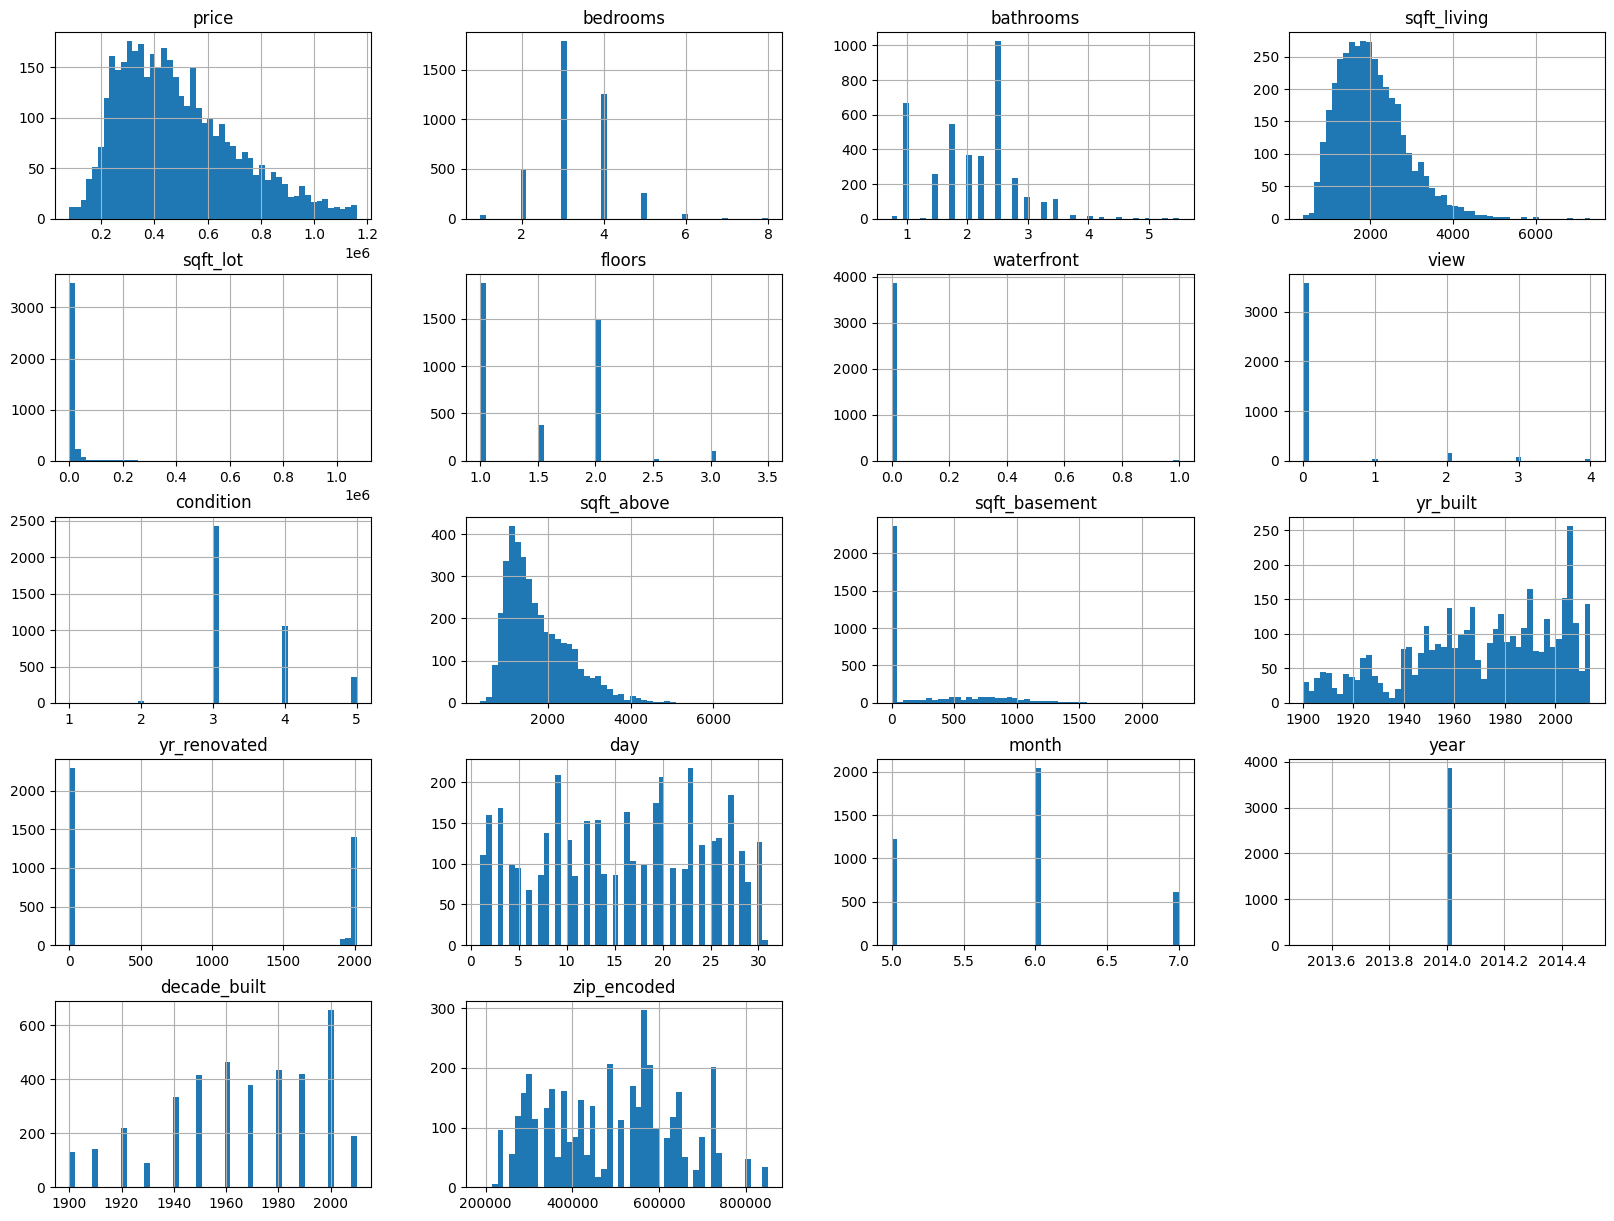

In [149]:
# histogram of all numerical variables
data.hist(bins = 50, figsize = (20, 15))
plt.show()

In [150]:
# set up data frame where city is not included
corrs = data.select_dtypes(exclude = 'object')

In [151]:
# correlation matrix
corr_matrix = corrs.corr()
corr_matrix['price'].sort_values(ascending = False)

price            1.000000
zip_encoded      0.687301
sqft_living      0.633164
sqft_above       0.544639
bathrooms        0.487606
bedrooms         0.313803
floors           0.275771
sqft_basement    0.232691
view             0.224112
sqft_lot         0.097828
waterfront       0.068505
decade_built     0.064399
yr_built         0.064273
condition        0.051303
month            0.037869
day             -0.040728
yr_renovated    -0.074370
year                  NaN
Name: price, dtype: float64

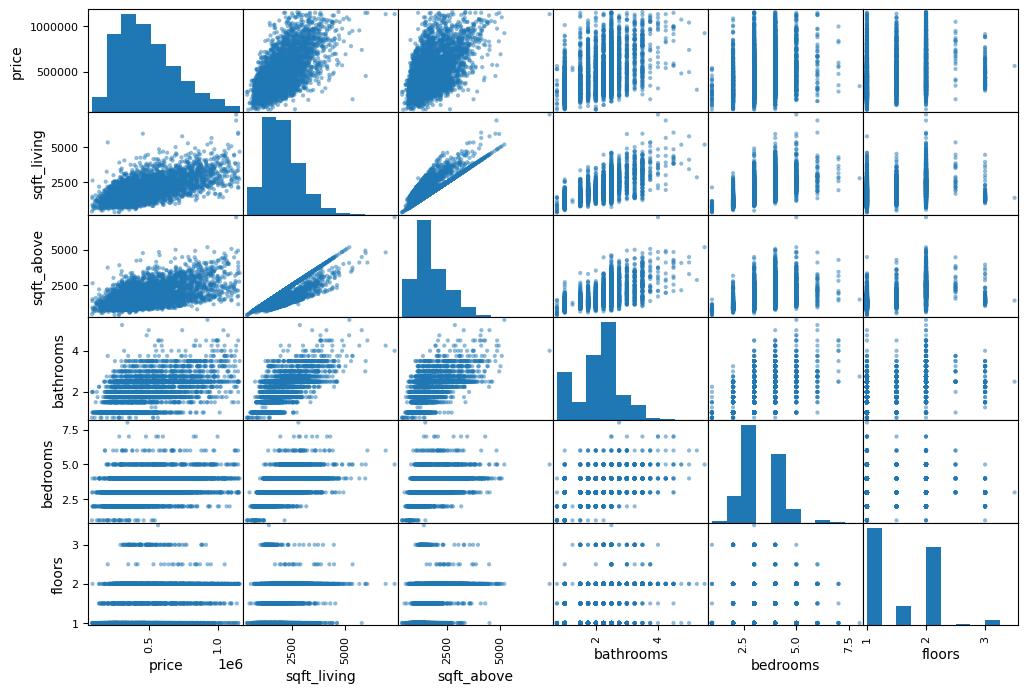

In [152]:
# scatter matrix of most correlated variables 
from pandas.plotting import scatter_matrix
attributes = ['price', 'sqft_living', 'sqft_above', 'bathrooms', 'bedrooms', 'floors']
scatter_matrix(data[attributes], figsize = (12, 8))
plt.show()

### Correlations Within Dependent Features

In [153]:
X = data.drop(columns = 'price', axis = 1)
y = data['price']

In [154]:
corrs = X.select_dtypes(exclude = 'object')
corrs_mat = corrs.corr()

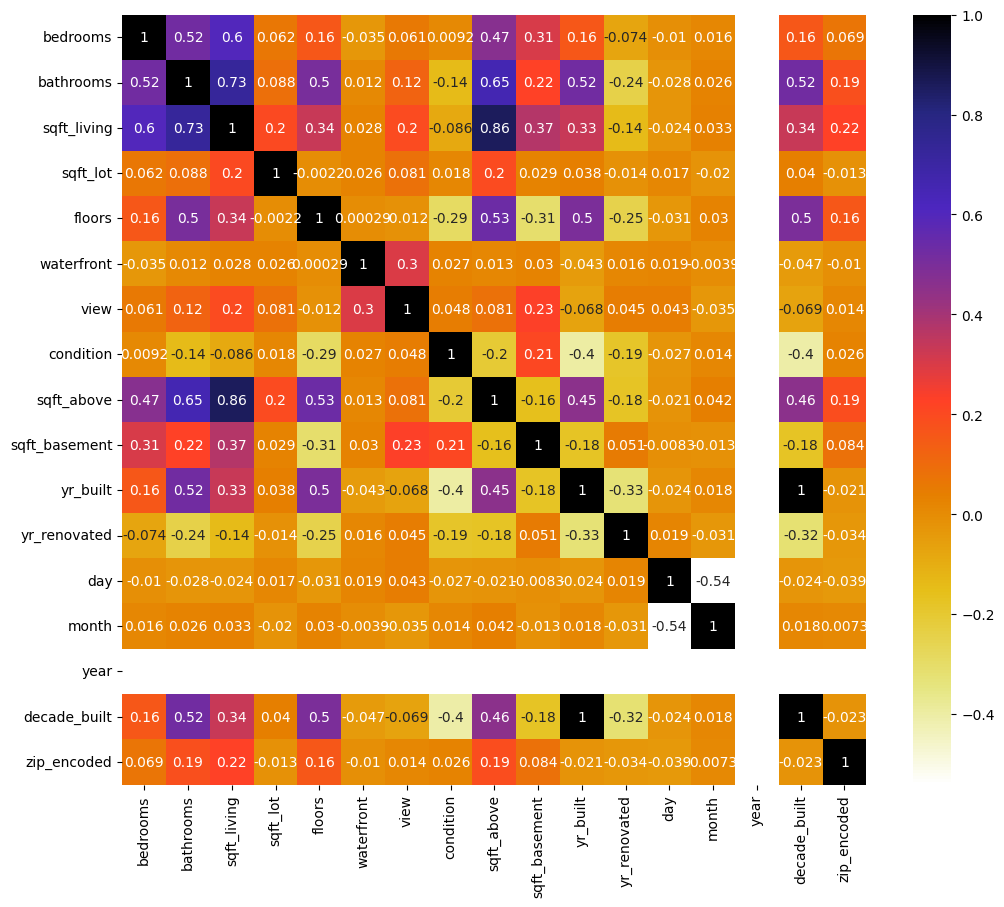

In [155]:
# correlation matrix
plt.figure(figsize = (12, 10))
sns.heatmap(corrs_mat, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

#### Setting up the Data

In [167]:
# drop unwanted columns
data_new = data.drop(columns = ['year', 'view', 'sqft_above', 'sqft_basement', 'zip_encoded', 'yr_built', 'day', 'month'], axis = 1)

In [168]:
data_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_renovated,city,country,state,zip,weekday,decade_built
0,376000.0,3.0,2.00,1340,1384,3.0,0,3,0,Seattle,USA,WA,98103,Friday,2000
1,800000.0,4.0,3.25,3540,159430,2.0,0,3,0,Carnation,USA,WA,98014,Friday,2000
3,324000.0,3.0,2.25,998,904,2.0,0,3,0,Seattle,USA,WA,98117,Friday,2000
4,549900.0,5.0,2.75,3060,7015,1.0,0,5,0,Seattle,USA,WA,98146,Saturday,1970
5,320000.0,3.0,2.50,2130,6969,2.0,0,3,0,Maple Valley,USA,WA,98038,Saturday,2000


In [169]:
# drop other columns too
data_new.drop(columns = ['state', 'zip', 'weekday'], axis = 1, inplace=True)

In [171]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3873 entries, 0 to 4139
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         3873 non-null   float64
 1   bedrooms      3873 non-null   float64
 2   bathrooms     3873 non-null   float64
 3   sqft_living   3873 non-null   int64  
 4   sqft_lot      3873 non-null   int64  
 5   floors        3873 non-null   float64
 6   waterfront    3873 non-null   int64  
 7   condition     3873 non-null   int64  
 8   yr_renovated  3873 non-null   int64  
 9   city          3873 non-null   object 
 10  country       3873 non-null   object 
 11  decade_built  3873 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 522.4+ KB


In [172]:
data_new.drop('country', axis = 1, inplace=True)

In [173]:
# save to csv
data_new.to_csv('../data/data_new.csv')